In [1]:
import sympy as sym
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from IPython.display import display, Math

# Summation and products

In [2]:
lst = [1,3,4,1,6]

print( sum(lst) )
print( np.sum(lst) )

15
15


In [3]:
np.prod(lst)

72

In [5]:
np.cumsum(lst)

array([ 1,  4,  8,  9, 15], dtype=int32)

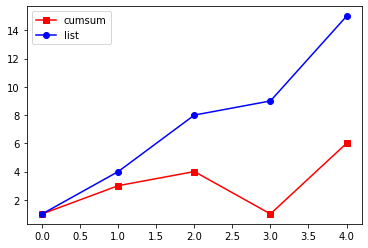

In [6]:
plt.plot(lst,'rs-')
plt.plot(np.cumsum(lst),'bo-')
plt.legend({'list','cumsum'})
plt.show()

In [8]:
# generate numerator
num = np.arange(1,6)
den = num**2

s1 = np.sum(num) / np.sum(den)
s2 = 1 / np.sum(num)

print('Option 1 = %s\nOption 2 = %s' %(s1,s2))

Option 1 = 0.2727272727272727
Option 2 = 0.06666666666666667


In [9]:
# then repeat with prod
s1 = np.prod(num) / np.prod(den)
s2 = 1 / np.prod(num)

print('Option 1 = %s\nOption 2 = %s' %(s1,s2))

Option 1 = 0.008333333333333333
Option 2 = 0.008333333333333333


# Differences (discrete derivative)

In [10]:
print(2-1)

1


In [11]:
v = [1,2]
np.diff(v)

array([1])

In [12]:
v = [1,2,4,-10]
np.diff(v)

array([  1,   2, -14])

In [17]:
v = np.arange(0,11)
print(v)
print(np.diff(v))
print(np.diff(v,2)) # difference of the difference
print(np.diff(np.diff(v))) # same as above

[ 0  1  2  3  4  5  6  7  8  9 10]
[1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0]


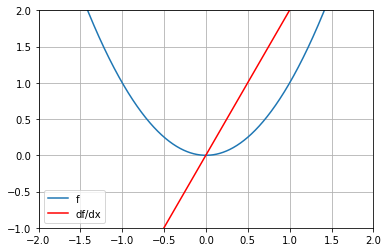

In [31]:
# plot x^2 and its derivative
x = np.linspace(-2,2,1021)
f = x**2

dx = np.diff(x) # differences in the x-values
df = np.diff(f) # differences of the function output with respect to x-values


plt.plot(x,f,label='f')
plt.plot(x[0:-1],df/dx,'r',label='df/dx')

plt.axis([-2,2,-1,2])
plt.grid()
plt.legend()
plt.show()

# Roots of polynomials

In [21]:
### the equation:
# 3x^2 + 2x - 1

# define the coefficients
coefs = [3,2,-1]

# and solve
roots = np.roots(coefs)

print(roots) # solution to setting formula to 0 and finding poly (x) values

[-1.          0.33333333]


In [35]:
# solve
from sympy.abc import x

eq = 3*x**2 + 2*x - 1

for i in roots:
    display(Math('\\text{At x=}%g\\text{, }%s = %g' %(i,sym.latex(eq),eq.subs(x,i))))
    

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [34]:
# zero-degree polynomial
# np.roots(8) generates an error

In [36]:
# for different polynomial degrees, count the number of roots

for i in range(1,11):
    coefs = np.arange(1,i+1)
    print('A degree-%s polynomial has %s roots' %(len(coefs)-1,len(np.roots(coefs))))

A degree-0 polynomial has 0 roots
A degree-1 polynomial has 1 roots
A degree-2 polynomial has 2 roots
A degree-3 polynomial has 3 roots
A degree-4 polynomial has 4 roots
A degree-5 polynomial has 5 roots
A degree-6 polynomial has 6 roots
A degree-7 polynomial has 7 roots
A degree-8 polynomial has 8 roots
A degree-9 polynomial has 9 roots


# The quadratic equation and functions

In [37]:
# the quadratic equation

a = 2
b = 7
c = 5

quadeqP = ( -b + np.sqrt(b**2 - 4*a*c) ) / (2*a)
quadeqM = ( -b - np.sqrt(b**2 - 4*a*c) ) / (2*a)

print(quadeqP,quadeqM)

-1.0 -2.5


In [40]:
# you can use scipy instead of numpy for complex results to sqrt...

a = 3
b = 7
c = 5

quadeqP = ( -b + sp.sqrt(b**2 - 4*a*c) ) / (2*a)
quadeqM = ( -b - sp.sqrt(b**2 - 4*a*c) ) / (2*a)

print(quadeqP,quadeqM)

(-1.1666666666666665+0.5527707983925666j) (-1.1666666666666665-0.5527707983925666j)


<ipython-input-40-db195a78e0bb>:7: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  quadeqP = ( -b + sp.sqrt(b**2 - 4*a*c) ) / (2*a)
<ipython-input-40-db195a78e0bb>:8: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  quadeqM = ( -b - sp.sqrt(b**2 - 4*a*c) ) / (2*a)


In [45]:
# ... or explicitly tell numpy to allow complex-valued solutions

a = 3
b = 7
c = 5

quadeqP = ( -b + np.sqrt(b**2 - 4*a*c,dtype=complex) ) / (2*a)
quadeqM = ( -b - np.sqrt(b**2 - 4*a*c,dtype=complex) ) / (2*a)

print(quadeqP,quadeqM)

(-1.1666666666666665+0.5527707983925666j) (-1.1666666666666665-0.5527707983925666j)


In [54]:
# as a function!

def quadeq(a,b,c):
    
    # initialize
    out = np.zeros(2)
    
    # compute
    out[0] = ( -b - np.sqrt(b**2 - 4*a*c) ) / (2*a)
    out[1] = ( -b + np.sqrt(b**2 - 4*a*c) ) / (2*a)
    
    # output
    return out

In [55]:
# test!
print(quadeq(2,7,2))

print(quadeq(1,4,-2))

[-3.18614066 -0.31385934]
[-4.44948974  0.44948974]


<ipython-input-54-41e3f99ed886>:9: RuntimeWarning: invalid value encountered in sqrt
  out[0] = ( -b - np.sqrt(b**2 - 4*a*c) ) / (2*a)
<ipython-input-54-41e3f99ed886>:10: RuntimeWarning: invalid value encountered in sqrt
  out[1] = ( -b + np.sqrt(b**2 - 4*a*c) ) / (2*a)


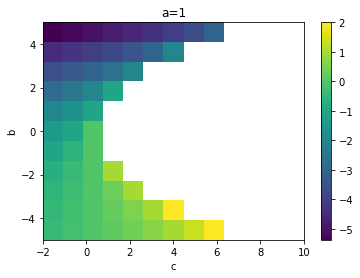

In [56]:
a = 1
b = range(-5,6)
c = range(-2,11)

M = np.zeros((len(b),len(c)))

for i in range(0,len(b)):
    for j in range(0,len(c)):
        M[i,j] = quadeq(a,b[i],c[j])[0]

        
plt.imshow(M,extent=[ c[0],c[-1],b[0],b[-1] ],origin='lower')
plt.xlabel('c')
plt.ylabel('b')
plt.title('a='+str(a))
plt.colorbar()
plt.show()

# Complex numbers: addition and subtraction

In [58]:
# some correct and incorrect ways to get the imaginary operator

print( 1j )
print( np.sqrt(-1,dtype='complex') )
print(sym.I) # in sympy

1j
1j
I


In [59]:
# create complex numbers

real_part = 4
imag_part = -6

cn1 = np.complex(real_part,imag_part)
cn2 = real_part + 1j*imag_part

In [60]:
# display
print(cn1)
print(cn2)

print( type(cn2) )

(4-6j)
(4-6j)
<class 'complex'>


In [61]:
# now for adding and subtracting
z1 = np.complex(4,5)
z2 = np.complex(6,-2)

print(z1+z2)
print(z1-z2)

(10+3j)
(-2+7j)


In [62]:
# extracting the real and imaginary parts of a complex number
print( 'The real part of z is ' + str(np.real(z1)))
print( 'The imaginary part of z is ' + str(np.imag(z1)))

The real part of z is 4.0
The imaginary part of z is 5.0


In [63]:
# complex addition is real parts summed and imaginary parts summed

w = np.complex(2,4)
z = np.complex(5,6)

# sum each part individually
realsum = np.real(w) + np.real(z)
imagsum = np.imag(w) + np.imag(z)

wPlusz1 = np.complex(realsum,imagsum)

# sum together in one go
wPlusz2 = w+z

print(wPlusz1)
print(wPlusz2)

(7+10j)
(7+10j)


# Complex numbers: conjugate and multiplication

In [64]:
# create complex numbers
z1 = np.complex(4,5)
z2 = np.complex(6,-2)

# multiplication the "manual" way
w = np.real(z1)*np.real(z2) + np.real(z1)*np.imag(z2)*1j + np.imag(z1)*np.real(z2)*1j + np.imag(z1)*np.imag(z2)*1j*1j

print(w)
sym.sympify(w)

(34+22j)


34.0 + 22.0*I

In [65]:
# or let Python do the hard work
sym.sympify(z1*z2)

34.0 + 22.0*I

In [66]:
# complex conjugate

z1 = np.complex(4,3)
z2 = np.complex(4,-3)

print( np.conj(z1) )
print( np.conj(z2) )

(4-3j)
(4+3j)


In [67]:
a,b = sym.symbols('a,b')#,real=True)

z = a + b*sym.I

sym.simplify( sym.expand( z*sym.conjugate(z) ) )

a*conjugate(a) - I*a*conjugate(b) + I*b*conjugate(a) + b*conjugate(b)

In [68]:
# with nicer printing

result = sym.simplify( sym.expand( z*sym.conjugate(z) ) )
display(Math('z\\times z^* = %s' %sym.latex(result)))

<IPython.core.display.Math object>

# Complex numbers: division

In [69]:
# create a complex number
z1 = np.complex(4,2)
z2 = np.complex(3,-5)

display(Math('\\frac{%s}{2} = %s' %(z1,z1/2) ))

<IPython.core.display.Math object>

In [70]:
display(Math('\\frac{%s \\times %s}{%s \\times %s} = \\frac{%s}{%s} = %s' # sometimes you need \
             %(z1,np.conj(z2), z2, np.conj(z2),
               z1*np.conj(z2), z2*np.conj(z2), sym.latex(sym.sympify(z1/z2)) )))

<IPython.core.display.Math object>

In [71]:
# create two numbers
z = np.complex(4,2)
w = np.complex(3,5)

# the parts related to the left multiplicand
left_numer = (z-1) * (z*w+w)
left_denom = w*z-w
left_part = left_numer / left_denom

# the parts related to the right multiplicand
right_numer = (w-1) * (1-w)
right_denom = -w**2*z - w**2 + 2*w*z + 2*w - z - 1
right_part = right_numer / right_denom

# put them together
solution = left_part * right_part

# and print!
print(solution)

(1+0j)


# VIDEO: Graphing complex numbers

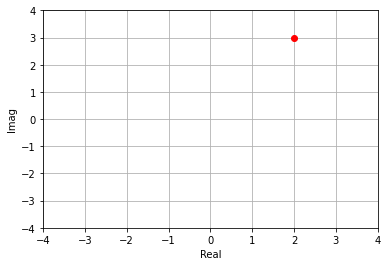

In [73]:
# create a complex number
z = np.complex(2,3)

plt.plot(np.real(z),np.imag(z),'ro')
plt.xlabel('Real')
plt.ylabel('Imag')
plt.grid()
plt.axis([-4,4,-4,4])
plt.show()

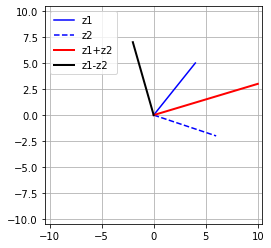

In [74]:
# drawing complex numbers as lines from the origin

# create complex numbers
z1 = np.complex(4,5)
z2 = np.complex(6,-2)

# draw the lines
plt.plot([0,np.real(z1)],[0,np.imag(z1)],color='b',label='z1')
plt.plot([0,np.real(z2)],[0,np.imag(z2)],'b--',label='z2')

# new variables for convenience
z1Pz2 = z1+z2
z1Mz2 = z1-z2

# draw more lines!
plt.plot([0,np.real(z1Pz2)],[0,np.imag(z1Pz2)],'r',label='z1+z2',linewidth=2)
plt.plot([0,np.real(z1Mz2)],[0,np.imag(z1Mz2)],'k',label='z1-z2',linewidth=2)


# make the plot look a bit nicer
plt.axis('square')
plt.axis(np.multiply([-1,1,-1,1],np.abs(z1Pz2)))
plt.grid(True)
plt.legend()
plt.show()

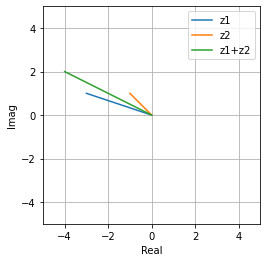

In [75]:
# adding two complex numbers
z1 = np.complex(-3,1)
z2 = np.complex(-1,1)

# their sum
z3 = z1+z2

plt.plot([0,np.real(z1)],[0,np.imag(z1)],label='z1')
plt.plot([0,np.real(z2)],[0,np.imag(z2)],label='z2')
plt.plot([0,np.real(z3)],[0,np.imag(z3)],label='z1+z2')

plt.axis('square')
plt.axis([-5,5,-5,5])
plt.legend()
plt.grid()
plt.xlabel('Real')
plt.ylabel('Imag')

plt.show()

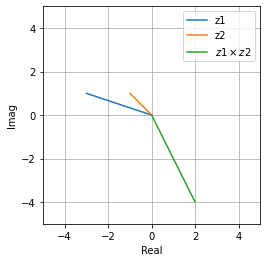

In [76]:
# multiplying two complex numbers

# their product
z3 = z1*z2

plt.plot([0,np.real(z1)],[0,np.imag(z1)],label='z1')
plt.plot([0,np.real(z2)],[0,np.imag(z2)],label='z2')
plt.plot([0,np.real(z3)],[0,np.imag(z3)],label='$z1\\times z2$')

plt.axis('square')
plt.axis([-5,5,-5,5])
plt.legend()
plt.grid()
plt.xlabel('Real')
plt.ylabel('Imag')

plt.show()

# Revising the quadratic equation with complex numbers

In [77]:
# as a function!

def quadeq(a,b,c):
    
    # initialize
    out = sp.zeros(2,dtype=complex)
    
    # compute
    out[0] = ( -b - sp.sqrt(b**2 - 4*a*c) ) / (2*a)
    out[1] = ( -b + sp.sqrt(b**2 - 4*a*c) ) / (2*a)
    
    # output
    return out

<ipython-input-77-f9bd19c24c98>:6: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  out = sp.zeros(2,dtype=complex)
<ipython-input-77-f9bd19c24c98>:9: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  out[0] = ( -b - sp.sqrt(b**2 - 4*a*c) ) / (2*a)
<ipython-input-77-f9bd19c24c98>:10: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  out[1] = ( -b + sp.sqrt(b**2 - 4*a*c) ) / (2*a)
<ipython-input-78-a2d7119778ad>:13: DeprecationWarning: scipy.real is deprecated and will be removed in SciPy 2.0.0, use numpy.real instead
  plt.imshow(sp.real(M))
<ipython-input-78-a2d7119778ad>:17: DeprecationWarning: scipy.imag is deprecated and will be removed in SciPy 2.0.0, use numpy.imag instead
  plt.imshow(sp.imag(M))
<ipython-input-78-a2d7119778ad>:21: DeprecationWarning: scipy.absolute is deprecated and wil

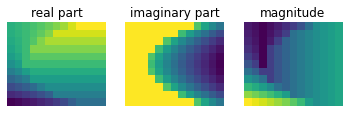

In [78]:
x = 1
y = range(-5,6)
z = range(-2,11)

M = np.zeros((len(y),len(z)),dtype=complex)

for i in range(0,len(y)):
    for j in range(0,len(z)):
        M[i,j] = quadeq(1,y[i],z[j])[0]


plt.subplot(1,3,1)
plt.imshow(sp.real(M))
plt.axis('off'), plt.title('real part')

plt.subplot(132)
plt.imshow(sp.imag(M))
plt.axis('off'), plt.title('imaginary part')

plt.subplot(133)
plt.imshow(sp.absolute(M))
plt.axis('off'), plt.title('magnitude')

plt.show()

# The unit circle

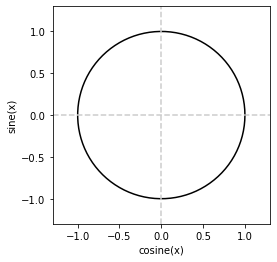

In [79]:
# create a unit circle via trigonometry

# define the phase angles
x = np.linspace(0,2*np.pi,100)

# generate the plot
plt.plot(np.cos(x),np.sin(x),'k')

# draw axis lines
plt.plot([-1.3,1.3],[0,0],'--',color=[.8,.8,.8])
plt.plot([0,0],[-1.3,1.3],'--',color=[.8,.8,.8])

# make it look nicer
plt.axis('square')
plt.axis([-1.3,1.3,-1.3,1.3])
plt.xlabel('cosine(x)')
plt.ylabel('sine(x)')
plt.plot()

plt.show()

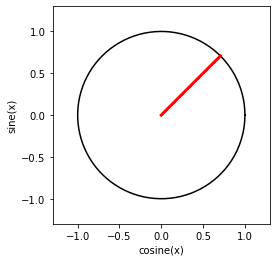

In [80]:
# draw the circle again
plt.plot(np.cos(x),np.sin(x),'k')

# now draw a vector
angle = np.pi/4
plt.plot([0,np.cos(angle)],[0,np.sin(angle)],'r',linewidth=3)

# make it look nicer
plt.axis('square')
plt.xlabel('cosine(x)')
plt.ylabel('sine(x)')
plt.axis([-1.3,1.3,-1.3,1.3])

plt.show()

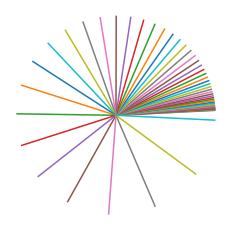

In [81]:
x = np.linspace(-3,1.83,50)
a = np.exp(x)

for i in a:
    plt.plot([0,np.cos(i)],[0,np.sin(i)])

    
# make it look nicer
plt.axis('square')
plt.axis('off')

plt.show()

# Natural exponent and logarithm

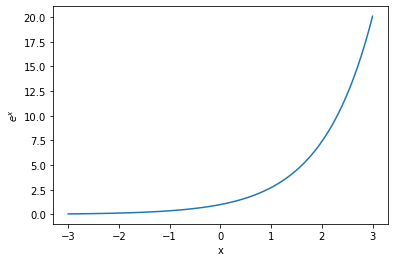

In [82]:
x = np.linspace(-3,3,100)

plt.plot(x,np.exp(x)) # e^x
plt.xlabel('x')
plt.ylabel('$e^x$')
plt.show()

<ipython-input-83-dfe5d60a4387>:1: RuntimeWarning: invalid value encountered in log
  plt.plot(x,np.log(x))


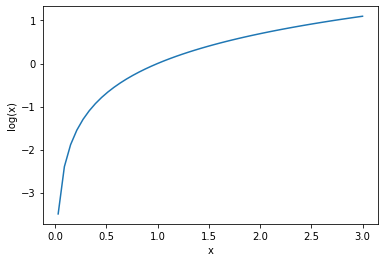

In [83]:
plt.plot(x,np.log(x))
plt.xlabel('x')
plt.ylabel('log(x)')
plt.show()

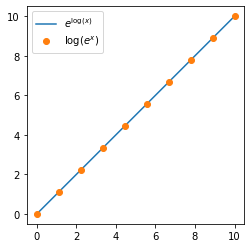

In [84]:
# visualize that log and e are inverses of each other (positive values only)

x = np.linspace(.0001,10,10)

# plot it both ways
plt.plot(x,np.log(np.exp(x)))
plt.plot(x,np.exp(np.log(x)),'o')

plt.axis('square')
plt.legend({'$\\log(e^x)$','$e^{\\log(x)}$'})
plt.show()

# Find a specific point on a Gaussian

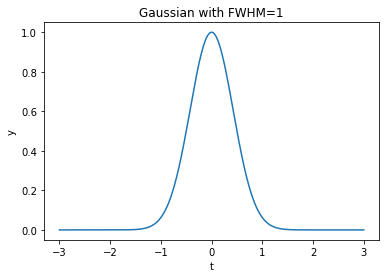

In [89]:
# the key parameter (FWHM - full width at half-maximum)
h = 1

# "Time" variable
t = np.linspace(-3,3,1001)

# gaussian
g = np.exp( -4*np.log(2)*t**2 / h**2 )

# and plot
plt.plot(t,g)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Gaussian with FWHM=' + str(h))
plt.show()

In [96]:
# find the x-axis value (here variable 't') for a given function value

yVal2find = .5

# apply the formula shown in the slides
tvals = h*np.sqrt( np.log(yVal2find)/(-4*np.log(2)) )

# print out the results
print(tvals,-tvals)

0.5 -0.5


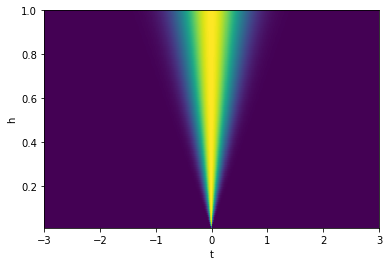

In [98]:
N = 100 # number of Gaussians
h = np.zeros(N)
t = np.linspace(-3,3,1001)

G = np.zeros((N,len(t)))

for i in range(N):
    h[i] = (i+1)/N
    G[i,:] = np.exp( -4*np.log(2)*t**2 / h[i]**2 )

plt.pcolormesh(t,h,G)
plt.xlabel('t')
plt.ylabel('h')
plt.show()

# Graphing the complex roots of unity

In [99]:
# confirm that the roots of unity produce 1

n = 5
for k in range(0,n):
    root = sym.exp( (2*k*sym.pi*sym.I)/n )
    display(Math('%s \\Rightarrow %s' %(sym.latex(root),sym.latex(root**n)   )))


print(roots)
print(np.real(np.prod(roots)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[-1.          0.33333333]


In [100]:
print(np.real(np.prod(roots)))

-0.3333333333333333


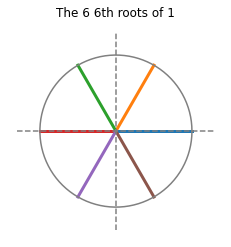

In [101]:
# parameter for number of roots to show
n = 6

for k in range(0,n):
    
    # compute this root
    root = np.exp( (2*k*np.pi*1j)/n )
    
    # plot it
    plt.plot([0,np.real(root)],[0,np.imag(root)],linewidth=3)


# generate the plot with the unit circle on top
x = np.linspace(0,2*np.pi,100) # copied from previous lecture!
plt.plot(np.cos(x),np.sin(x),color='gray')

# draw axis lines
plt.plot([-1.3,1.3],[0,0],'--',color='gray')
plt.plot([0,0],[-1.3,1.3],'--',color='gray')


# make the plot look nicer
plt.axis([-1.3,1.3,-1.3,1.3])
plt.axis('square')
plt.axis('off')
plt.title('The %g %gth roots of 1' %(n,n))
plt.show()

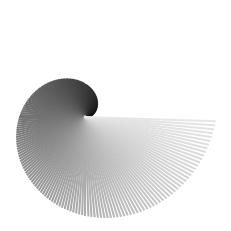

In [102]:
# parameter for number of roots to show
n = 200

color = np.linspace(0,.9,n)

for k in range(0,n):
    
    # compute this root
    root = k*np.exp( (2*k*np.pi*1j)/n )
    
    # plot it
    plt.plot([0,np.real(root)],[0,np.imag(root)],linewidth=2,color=[color[k],color[k],color[k]])

# make the plot look nicer
plt.axis('square')
plt.axis('off')
plt.show()

# Log-spaced and linearly spaced numbers

In [103]:
np.linspace(-2,4,10)

array([-2.        , -1.33333333, -0.66666667,  0.        ,  0.66666667,
        1.33333333,  2.        ,  2.66666667,  3.33333333,  4.        ])

In [104]:
# log-spaced
np.logspace(1,2,10)

array([ 10.        ,  12.91549665,  16.68100537,  21.5443469 ,
        27.82559402,  35.93813664,  46.41588834,  59.94842503,
        77.42636827, 100.        ])

In [105]:
a = np.log10(2.3)
b = np.log10(14.3)
n = 14

np.logspace(a,b,n)

array([ 2.3       ,  2.64712604,  3.04664186,  3.50645436,  4.03566376,
        4.64474376,  5.34574877,  6.15255251,  7.0811226 ,  8.14983655,
        9.37984546, 10.7954927 , 12.4247956 , 14.3       ])

In [106]:
a = np.log10(1)
b = np.log10(5)
n = 5

np.logspace(a,b,n)

array([1.        , 1.49534878, 2.23606798, 3.34370152, 5.        ])

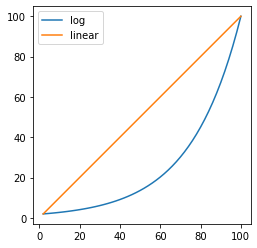

In [107]:
a = 2
b = 100
n = 50

lo = np.logspace(np.log10(a),np.log10(b),n)
li = np.linspace(a,b,n)

plt.plot(li,lo,label='log')
plt.plot(li,li,label='linear')

plt.legend()
plt.axis('square')
plt.show()


# Logarithm properties: Multiplication and division

In [108]:
a = 3
b = 4

# multiplication rule

res1 = np.log(a*b)
res2 = np.log(a) * np.log(b)
res3 = np.log(a) + np.log(b)

display(Math('\\log(%g\\times%g) = %g' %(a,b,res1)))
display(Math('\\log(%g)\\times\\log(%g) = %g' %(a,b,res2)))
display(Math('\\log(%g)+\\log(%g) = %g' %(a,b,res3)))

display(Math('\\log(%g\\times%g) \\neq \\log(%g)\\times\\log(%g)' %(a,b,a,b)))
display(Math('\\log(%g\\times%g) = \\log(%g)+\\log(%g)' %(a,b,a,b)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [109]:
# repeat for division

res1 = np.log(a/b)
res2 = np.log(a) / np.log(b)
res3 = np.log(a) - np.log(b)

display(Math('\\log(\\frac{%g}{%g}) = %g' %(a,b,res1)))
display(Math('\\log(%g)/\\log(%g) = %g' %(a,b,res2)))
display(Math('\\log(%g)-\\log(%g) = %g' %(a,b,res3)))

display(Math('\\log{\\left(\\frac{%g}{%g}\\right)} \\neq \\frac{\\log(%g)}{\\log(%g)}' %(a,b,a,b)))
display(Math('\\log{\\left(\\frac{%g}{%g}\\right)} = \\log(%g)-\\log(%g)' %(a,b,a,b)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [110]:
# exponential rule

expr1 = np.log(a**b)
expr2 = b*np.log(a)

print(expr1-expr2)

0.0


In [111]:
expr1 = np.log(3**3)
expr2 = 3*np.log(3)
expr3 = np.log(3) + np.log(3) + np.log(3)

print(expr1,expr1-expr2,expr1-expr3)

3.295836866004329 0.0 0.0


# Scientific notation

In [112]:
# write the following number in scientific notation
x = 2938429348

'{:,e}'.format(x)

'2.938429e+09'

In [113]:
# numbers are easier to read with commas!

# or f
'{:,d}'.format(x)

'2,938,429,348'

In [114]:
# another way...
'%.2e' %(x)

'2.94e+09'

In [115]:
# notice this is a string

s = '%.3e' %(x)
print(s)
print( type(s) )

# so you can index or slice parts of it
s[2:4]

2.938e+09
<class 'str'>


'93'

In [116]:
# list the number
num = 2342

# order of magnitude
orderOfMag = int(np.floor(np.log10(abs(num))))

# convert to scientific notation and get the characters before the period
numstr = '{:,e}'.format(num)
wheredot = numstr.find('.')
scinot = numstr[:wheredot]

display(Math( '%s\\text{ is }%s\\text{ orders of magnitude, }\\approx %s\\times10^{%g}' \
             %(num,orderOfMag,scinot,orderOfMag) ))

<IPython.core.display.Math object>

# Maxima and minima of a function

In [117]:
# max and argmax
lst = [-4,5.5,3,2]

print(np.max(lst))
print(np.argmax(lst))

5.5
1


-0.7388185920927908
9


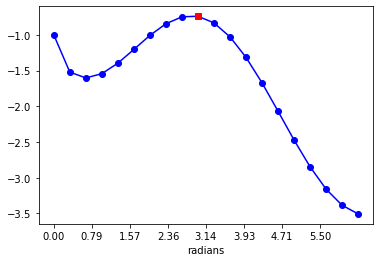

In [118]:
# method: evaluate specific points in the function

# x range
x = np.linspace(0,2*np.pi,20)

# the function f(x)
fx = -( np.cos(x) + x**(1/2) )

# find the maximum value of this function
fmax = np.max(fx)
print(fmax)

# but we also need to know the location where this maximum is obtained
fmaxidx = np.argmax(fx)
print(fmaxidx)

# draw the function
plt.plot(x,fx,'bo-')
plt.plot(x[fmaxidx],fmax,'rs')

plt.xlabel('radians')
plt.xticks(np.round(np.arange(0,2*np.pi,np.pi/4),2))
plt.show()

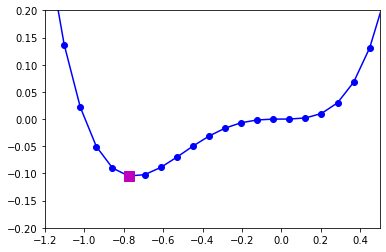

In [119]:
# minimum

# the range and the function
x = np.linspace(-2,2,50)
fx = x**3 + x**4

# find the minimum
fminidx = np.argmin(fx)

# draw the function
plt.plot(x,fx,'bo-')
plt.plot(x[fminidx],fx[fminidx],'ms',markersize=10)

plt.ylim([-.2,.2])
plt.xlim([-1.2,.5])
plt.show()


(array([ 15,  49,  82, 116, 149, 182], dtype=int64), {})


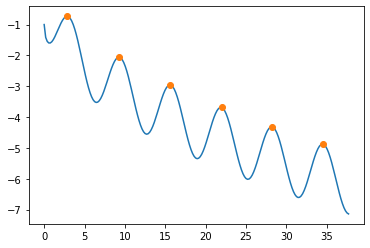

In [120]:
from scipy.signal import find_peaks

# x range
x = np.linspace(0,12*np.pi,200)

# the function f(x)
fx = -( np.cos(x) + x**(1/2) )

# find peaks
peeks = find_peaks(fx)
print(peeks)

# draw the function
plt.plot(x,fx)
plt.plot(x[peeks[0]],fx[peeks[0]],'o')
plt.show()


# Even and odd functions

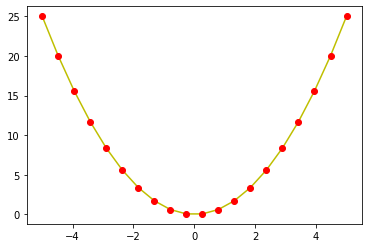

In [124]:
# create an even function
x = np.linspace(-5,5,20)

fEven = x**2

fEvenNegative = (-x)**2

plt.plot(x,fEven, 'y')
plt.plot(x,fEvenNegative,'ro')
plt.show()

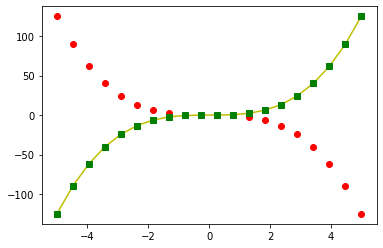

In [123]:
# create an odd function
x = np.linspace(-5,5,20)

fOdd = x**3

fOddNegative = (-x)**3

plt.plot(x,fOdd, 'y')
plt.plot(x,fOddNegative,'ro')
plt.plot(x,-fOddNegative,'gs')
plt.show()

### Exercise

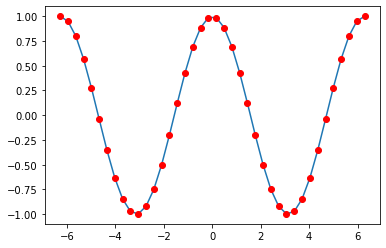

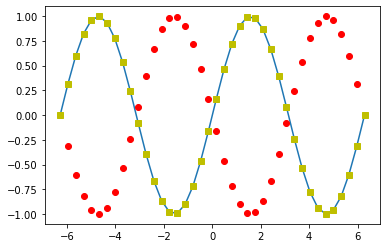

In [125]:
# using graphing to infer whether cos and sine are even or odd functions

theta = np.linspace(-2*np.pi,2*np.pi,40)

cosfun = np.cos(theta)
cosfunN = np.cos(-theta)

plt.plot(theta,cosfun)
plt.plot(theta,cosfunN,'ro')
plt.show()


# repeat for sin
sinfun = np.sin(theta)
sinfunN = np.sin(-theta)

plt.plot(theta,sinfun)
plt.plot(theta,sinfunN,'ro')
plt.plot(theta,-sinfunN,'ys')
plt.show()


# Arithmetic and geometric sequences

In [126]:
# arithmetic sequence

a = 2
d = 3
maxn = 6

ariseq = a + d*np.arange(0,maxn)
print(ariseq)

[ 2  5  8 11 14 17]


In [127]:
# geometric sequence
a = 2
r = 3

geoseq = a * r**np.arange(0,maxn)
print(geoseq)

[  2   6  18  54 162 486]


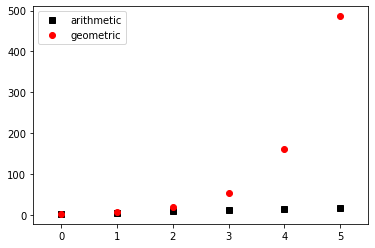

In [128]:
plt.plot(ariseq,'ks',label='arithmetic')
plt.plot(geoseq,'ro',label='geometric')

plt.xlim([-.5,maxn-.5])
plt.legend()
plt.show()

In [129]:
# confirm that nth term is a+(n-1)*d and a*r**(n-1) by indexing and direct computation

# parameters
a = 2
d = 3
maxn = 10

# compute sequences
ariseq = a + d*np.arange(0,maxn)
geoseq = a * d**np.arange(0,maxn)

# which element to find?
nth = 6

# find by direct computation
ariDirect = a + (nth-1)*d
geoDirect = a * d**(nth-1)

# compare against order in sequence
print(ariseq[nth-1],ariDirect)
print(geoseq[nth-1],geoDirect)

17 17
486 486


In [131]:
geoseq

array([    2,     6,    18,    54,   162,   486,  1458,  4374, 13122,
       39366], dtype=int32)

In [130]:
ariseq

array([ 2,  5,  8, 11, 14, 17, 20, 23, 26, 29])

In [134]:
### the equation:
# 4 - 2x + 5x^3

# define the coefficients
coefs = [5,0,-2,4]

# solve
roots = np.roots(coefs)

# and display
from sympy.abc import x

p = sym.Poly(coefs,x)

display(Math(sym.latex(p)))

<IPython.core.display.Math object>

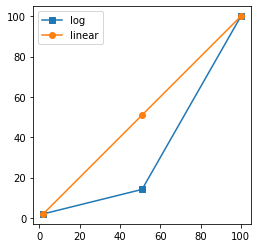

In [136]:
a =   2 # lower bound
b = 100 # upper bound
n =   3 # number of steps

lo = np.logspace(np.log10(a),np.log10(b),n)
li = np.linspace(a,b,n)

plt.plot(li,lo,'s-',label='log')
plt.plot(li,li,'o-',label='linear')

plt.legend()
plt.axis('square')
plt.show()

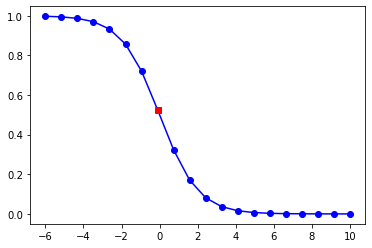

In [137]:
## Goal is to plot the point on the function closest to f(x)=.5

# x range
x = np.linspace(-6,10,20)

# the function f(x)
fx = 1/(1+np.exp(x))

# function maximum
fmaxidx = np.argmin(abs(fx-.5))

# draw the function
plt.plot(x,fx,'bo-')
plt.plot(x[fmaxidx],fx[fmaxidx],'rs')

plt.show()

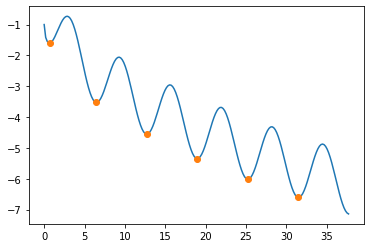

In [138]:
## Goal is to find the local minima by adding one character

from scipy.signal import find_peaks

# x range
x = np.linspace(0,12*np.pi,200)

# the function f(x)
fx = -( np.cos(x) + x**(1/2) )

# find peaks
peeks = find_peaks(-fx)

# draw the function
plt.plot(x,fx)
plt.plot(x[peeks[0]],fx[peeks[0]],'o')
plt.show()